<a href="https://colab.research.google.com/github/GOPIKA-S-S/RL/blob/main/2348518_lab10_RLipynb.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Set Up Environment and Dependencies

In [ ]:
!pip install numpy gym tensorflow


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
Episode 0: Total Reward: 24.0
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
1/1 ━━━━━━━━━━━━━━━━

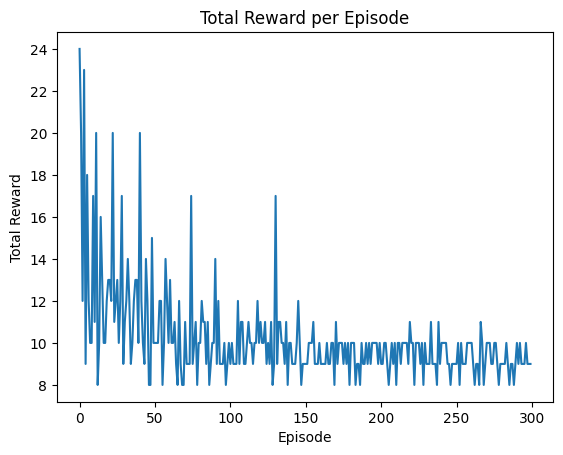

In [12]:
import gym
import numpy as np
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt

class PolicyGradientAgent:
    def __init__(self, state_dim, action_dim, learning_rate=0.01):
        self.state_dim = state_dim
        self.action_dim = action_dim
        self.learning_rate = learning_rate
        self.model = self.build_model()

    def build_model(self):
        model = keras.Sequential([
            keras.layers.Dense(24, activation='relu', input_shape=(self.state_dim,)),
            keras.layers.Dense(24, activation='relu'),
            keras.layers.Dense(self.action_dim, activation='softmax')
        ])
        model.compile(optimizer=keras.optimizers.Adam(learning_rate=self.learning_rate), loss=self.loss)
        return model

    def loss(self, y_true, y_pred):
        # Negative log likelihood
        return -tf.reduce_mean(tf.reduce_sum(y_true * tf.math.log(y_pred + 1e-10), axis=1))

    def choose_action(self, state):
        state = np.reshape(state, [1, self.state_dim])
        action_probs = self.model.predict(state).flatten()
        action = np.random.choice(self.action_dim, p=action_probs)
        return action, action_probs[action]

    def train(self, episode_data):
        states, actions, rewards = zip(*episode_data)
        discounted_rewards = self.compute_discounted_rewards(rewards)

        # One-hot encode the actions
        one_hot_actions = np.zeros((len(actions), self.action_dim))
        one_hot_actions[np.arange(len(actions)), actions] = 1

        # Train the model
        self.model.fit(np.array(states), one_hot_actions, sample_weight=np.array(discounted_rewards), verbose=0)

    def compute_discounted_rewards(self, rewards, gamma=0.99):
        discounted_rewards = np.zeros_like(rewards)
        cumulative = 0
        for t in reversed(range(len(rewards))):
            cumulative = cumulative * gamma + rewards[t]
            discounted_rewards[t] = cumulative
        return discounted_rewards

def train_agent(episodes=300):
    env = gym.make('CartPole-v1', new_step_api=True)
    state_dim = env.observation_space.shape[0]
    action_dim = env.action_space.n

    agent = PolicyGradientAgent(state_dim, action_dim)
    total_rewards = []

    for episode in range(episodes):
        state = env.reset()
        done = False
        episode_data = []
        total_reward = 0

        while not done:
            action, _ = agent.choose_action(state)
            next_state, reward, terminated, truncated, info = env.step(action)
            total_reward += reward

            episode_data.append((state, action, reward))
            state = next_state
            done = terminated or truncated

        total_rewards.append(total_reward)
        agent.train(episode_data)

        if episode % 100 == 0:
            print(f"Episode {episode}: Total Reward: {total_reward}")

    env.close()

    # Plot total rewards per episode
    plt.plot(total_rewards)
    plt.xlabel('Episode')
    plt.ylabel('Total Reward')
    plt.title('Total Reward per Episode')
    plt.show()

# Run the training agent
train_agent()
